不理想

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import blob_log
import plotly.express as px
import pandas as pd

In [27]:
skyfile = '/Users/apple/Desktop/CSE881/project/dataset/URSA_MINOR/ursa_minor.png'
img_gray = cv2.imread(skyfile,cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)

# for visualization purposes
magnitude_spectrum = 20*np.log(np.abs(fshift))
rows, cols = img_gray.shape
crow,ccol = rows/2 , cols/2

hpfmasksize = 30
fshift[int(crow-hpfmasksize):int(crow+hpfmasksize), int(ccol-hpfmasksize):int(ccol+hpfmasksize)] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
icutoff = 80.0
ifinal_high = 200.0
ifinal_low = 0.0

for p in range(0,rows):
	for q in range(0,cols):
		if  (img_back[p][q] >= icutoff):
			img_back[p][q] = ifinal_high
		else:
			img_back[p][q] = ifinal_low


img_back = cv2.convertScaleAbs(img_back)
img_gray_flipped = cv2.flip(img_back, 0)
blobs = blob_log(img_gray_flipped, max_sigma=30, num_sigma=10, threshold=.2)
y = blobs[:, 0]
x = blobs[:, 1]
r = blobs[:, 2]
df = pd.DataFrame({"x": x, "y": y, "r": r})
df

,x,y,r
0,124.0,167.0,1.0
1,287.0,68.0,1.0
2,284.0,216.0,1.0
3,224.0,108.0,1.0
4,11.0,231.0,1.0
5,73.0,133.0,1.0
6,184.0,151.0,1.0
7,123.0,203.0,1.0
8,249.0,62.0,1.0
9,49.0,196.0,1.0


/var/folders/cd/s7rvnz8129v27nvpxmvwn9hc0000gn/T/ipykernel_22047/1430627717.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), radius, color='white', alpha=1.0, edgecolor='none', zorder=10)


[]

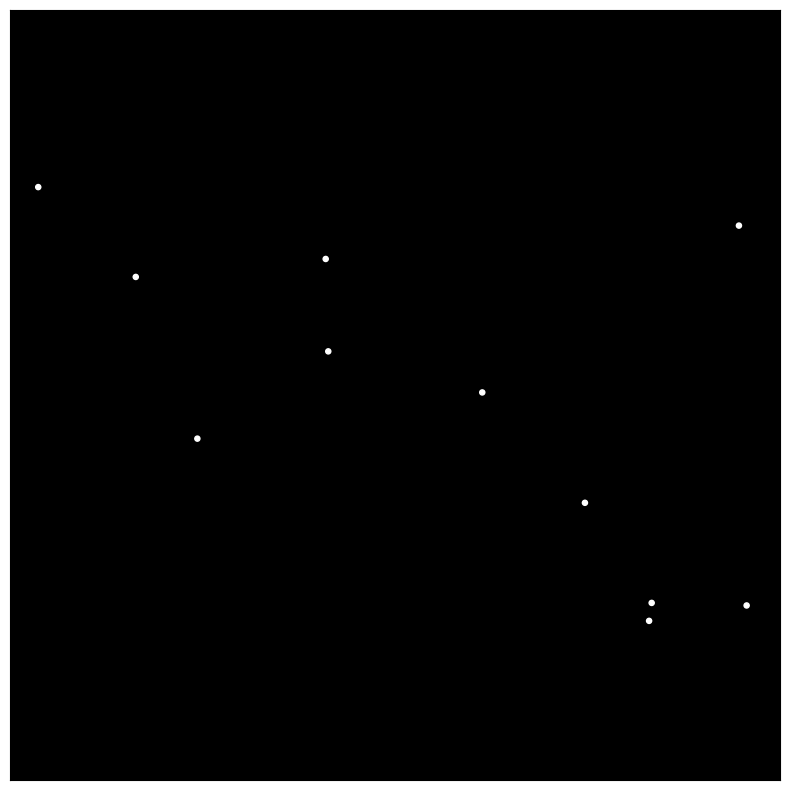

In [28]:

sky_image = plt.figure(figsize=(10, 10), dpi=100)
ax = sky_image.add_subplot(111)
for index, row in df.iterrows():
    x, y, radius = row['x'], row['y'], row['r']
    circle = plt.Circle((x, y), radius, color='white', alpha=1.0, edgecolor='none', zorder=10)
    ax.add_artist(circle)

# Customize the appearance of the sky (e.g., background color)
ax.set_xlim(0, 300)
ax.set_ylim(0, 300)
ax.set_aspect('equal')
ax.set_facecolor('black')  # Set the background color to black (representing the night sky)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])


In [8]:
skyfile = '/Users/apple/Desktop/CSE881/project/dataset/URSA_MINOR/ursa_minor.png'
img_gray = cv2.imread(skyfile,cv2.IMREAD_GRAYSCALE)
img_gray_flipped = cv2.flip(img_gray, 0)
blobs = blob_log(img_gray_flipped, max_sigma=30, num_sigma=10, threshold=.2)
y = blobs[:, 0]
x = blobs[:, 1]
r = blobs[:, 2]
df = pd.DataFrame({"x": x, "y": y, "r": r})
df

,x,y,r
0,249.0,66.0,4.222222
1,63.0,158.0,4.222222
2,287.0,68.0,1.000000
3,185.0,151.0,1.000000
4,124.0,167.0,1.000000
5,224.0,108.0,1.000000
6,123.0,203.0,1.000000
7,11.0,231.0,1.000000
8,284.0,216.0,1.000000
9,74.0,133.0,1.000000


/var/folders/cd/s7rvnz8129v27nvpxmvwn9hc0000gn/T/ipykernel_22047/2889722021.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), radius, color='white', alpha=1.0, edgecolor='none', zorder=10)


[]

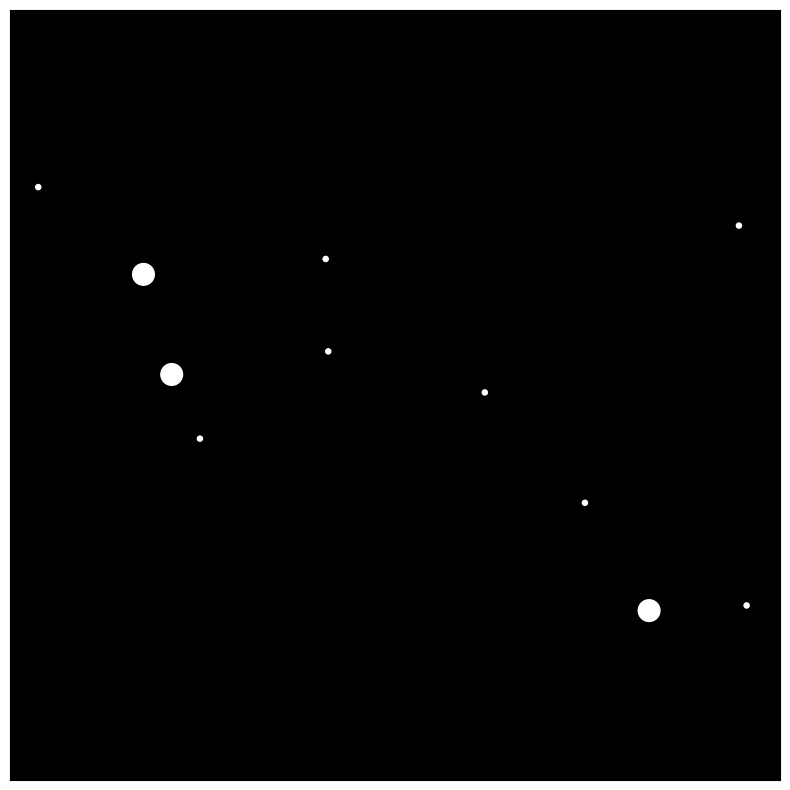

In [9]:
sky_image = plt.figure(figsize=(10, 10), dpi=100)
ax = sky_image.add_subplot(111)
for index, row in df.iterrows():
    x, y, radius = row['x'], row['y'], row['r']
    circle = plt.Circle((x, y), radius, color='white', alpha=1.0, edgecolor='none', zorder=10)
    ax.add_artist(circle)

# Customize the appearance of the sky (e.g., background color)
ax.set_xlim(0, 300)
ax.set_ylim(0, 300)
ax.set_aspect('equal')
ax.set_facecolor('black')  # Set the background color to black (representing the night sky)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])